# **Proyecto Final- Fundamentos de Ciencia de Datos**
## Comisión 24304- Equipo M

### Análisis Mapa del Delito CABA 2018-2022

1. La limpieza y adecuación de los datos, incluída su separación para entrenamiento y testeo.(*)  
2. La transformación adecuada de los datos.
3. Selección de variables de entrada (Features) y su justificación.
4. Seleccion de características para el modelo, los hiperparámetros (si fuesen necesarios) y su justificación.
5. Selección del modelo y las métricas para su evaluación y su justificación.
6. Los métodos gráficos para la discusión del modelo.
7. Argumentar brevemente aplicaciones para la predicción realizada.

In [31]:
#Importar Librarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import datetime as dt
import seaborn as sns


## Carga data

In [32]:
#Importar archivo
df=pd.read_csv("df_CABA_clean.csv").sample(6000)
df.head()

,anio,mes,dia,fecha,franja,tipo,subtipo,uso_arma,uso_moto,barrio,comuna,latitud,longitud
315729,2020,5,LUNES,2020-05-04,8,Robo,Robo total,SI,NO,PARQUE AVELLANEDA,9,-34.646146,-58.465015
10066,2018,4,SABADO,2018-04-14,7,Robo,Robo total,SI,NO,VILLA GRAL. MITRE,11,-34.617252,-58.470758
46579,2018,5,JUEVES,2018-05-17,18,Robo,Robo total,NO,SI,ALMAGRO,5,-34.602763,-58.424287
119247,2018,2,LUNES,2018-02-05,11,Lesiones,Lesiones Dolosas,NO,NO,MATADEROS,9,-34.673171,-58.502620
432998,2021,5,JUEVES,2021-05-27,22,Robo,Robo total,SI,NO,CONSTITUCION,1,-34.630858,-58.382670


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6000 entries, 315729 to 207332
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anio      6000 non-null   int64  
 1   mes       6000 non-null   int64  
 2   dia       6000 non-null   object 
 3   fecha     6000 non-null   object 
 4   franja    6000 non-null   int64  
 5   tipo      6000 non-null   object 
 6   subtipo   6000 non-null   object 
 7   uso_arma  6000 non-null   object 
 8   uso_moto  6000 non-null   object 
 9   barrio    6000 non-null   object 
 10  comuna    6000 non-null   int64  
 11  latitud   6000 non-null   float64
 12  longitud  6000 non-null   float64
dtypes: float64(2), int64(4), object(7)
memory usage: 656.2+ KB


## Variables Categoricas


<Axes: xlabel='tipo', ylabel='franja'>

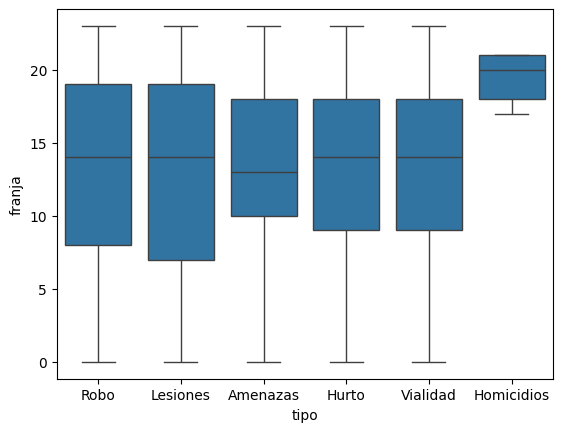

In [34]:
#Variable tipo
sns.boxplot(x="tipo", y="franja", data=df)

<Axes: xlabel='franja', ylabel='dia'>

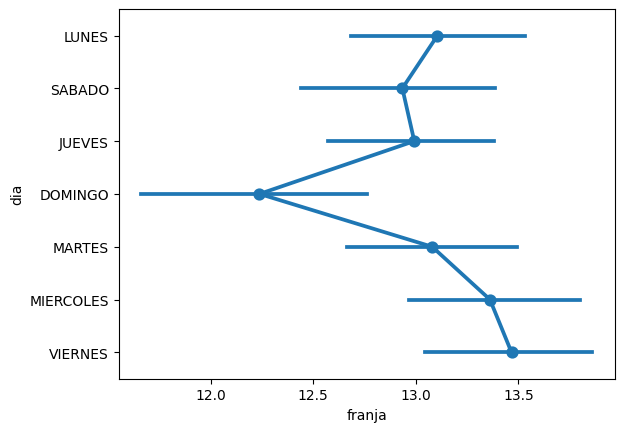

In [35]:
#Variable tipo
sns.pointplot(x="franja", y="dia", data=df)

<Axes: xlabel='dia', ylabel='franja'>

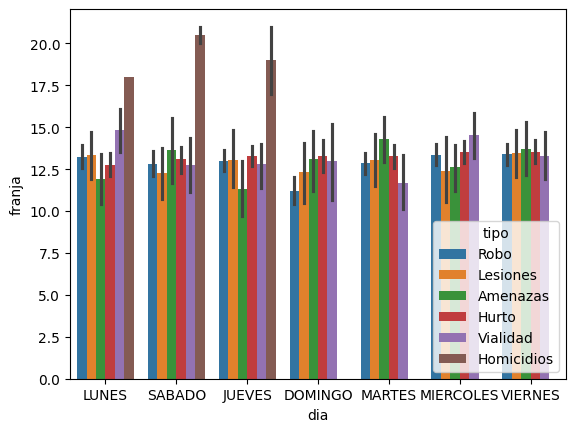

In [36]:
#Variable tipo
sns.barplot(x="dia", y="franja", hue= 'tipo', data=df)

In [37]:
import plotly.graph_objects as go
import plotly.express as px
pd.set_option('display.max_rows', None)
import datetime
from plotly.subplots import make_subplots

In [38]:
def treemap(categories,title,path,values):
    fig = px.treemap(categories, path=path, values=values, height=400,
                 title=title, color_discrete_sequence = px.colors.sequential.RdBu)
    fig.data[0].textinfo = 'label+text+value'
    fig.show()

def histogram(data,path,color,title,xaxis,yaxis):
    fig = px.histogram(data, x=path,color=color)
    fig.update_layout(
        title_text=title,
        xaxis_title_text=xaxis, 
        yaxis_title_text=yaxis, 
        bargap=0.2, 
        bargroupgap=0.1
    )
    fig.show()
    
def bar(categories,x,y,color,title,xlab,ylab):
    fig = px.bar(categories, x=x, y=y,
             color=color,
             height=500)
    fig.update_layout(
    title_text=title, 
    xaxis_title_text=xlab, 
    yaxis_title_text=ylab,
    bargap=0.2, 
    bargroupgap=0.1
    )
    fig.show()


In [39]:
#Numero de delitos
delitos = df['tipo'].value_counts()
values = delitos.values
categories = pd.DataFrame(data=delitos.index, columns=["tipo"])
categories['values'] = values

In [40]:
treemap(categories,'Principales tipo de delitos de CABA 2018-2022',['tipo'],categories['values'])


In [41]:
histogram(df,"subtipo","tipo",'Principales subtipos de delitos en CABA','Delito','Cantidad')

<Axes: ylabel='count'>

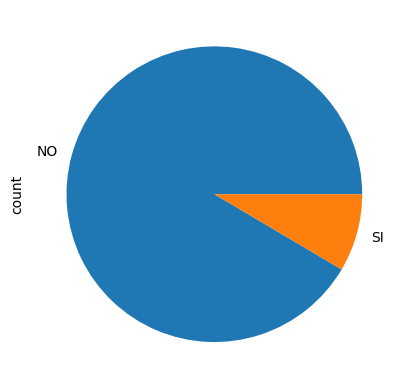

In [42]:
df['uso_arma'].value_counts().plot(kind='pie')